In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Crime by Category x gender

In [236]:
CatGenderDt = pd.read_csv('CrimebyCategoryxgender.csv')
CatGenderDt.shape

(56, 7)

In [237]:
CatGenderDt.head()

,cat,gender,y_2012,y_2013,y_2014,y_2015,y_2016
0,A10,M,158.0,117,138.0,167.0,148.0
1,A20,M,19060.0,21646,21954.0,22469.0,25075.0
2,A30,M,2714.0,2899,3117.0,3148.0,3675.0
3,A40,M,238.0,219,242.0,250.0,293.0
4,A50,M,2030.0,1804,1472.0,1682.0,2068.0


In [238]:
CatGenderDt.columns= 'Category', 'Gender', '2012', '2013', '2014', '2015', '2016'
# Mean of the 5 years per category
CatGenderDt['Mean'] = [(CatGenderDt.iloc[i])[['2012', '2013', '2014', '2015', '2016']].mean() for i in range(CatGenderDt.shape[0])]

In [239]:
CatGenderDt.head()

,Category,Gender,2012,2013,2014,2015,2016,Mean
0,A10,M,158.0,117,138.0,167.0,148.0,145.6
1,A20,M,19060.0,21646,21954.0,22469.0,25075.0,22040.8
2,A30,M,2714.0,2899,3117.0,3148.0,3675.0,3110.6
3,A40,M,238.0,219,242.0,250.0,293.0,248.4
4,A50,M,2030.0,1804,1472.0,1682.0,2068.0,1811.2


In [240]:
catdf=pd.read_csv('Categories.csv', index_col='Category')
catdf.head()

,Offence
Category,
A10,Homicide and related offences
A20,Assault and related offences
A30,Sexual offences
A40,Abduction and related offences
A50,Robbery


In [241]:
CatGenderDtold=CatGenderDt.copy()
CatGenderDt=CatGenderDt.join(catdf, on='Category')

In [242]:
CatGenderDt[CatGenderDt.isnull().any(axis=1)]

,Category,Gender,2012,2013,2014,2015,2016,Mean,Offence
17,C90,M,NaN,5,NaN,NaN,0.0,2.5,Other drug offences
41,B60,F,NaN,0,NaN,NaN,NaN,0.0,Bribery
45,C90,F,NaN,0,NaN,NaN,6.0,3.0,Other drug offences
49,D40,F,NaN,4,0.0,5.0,NaN,3.0,Public security offences
52,F10,F,NaN,0,0.0,0.0,0.0,0.0,Regulatory driving offences


### Gender x Crimes

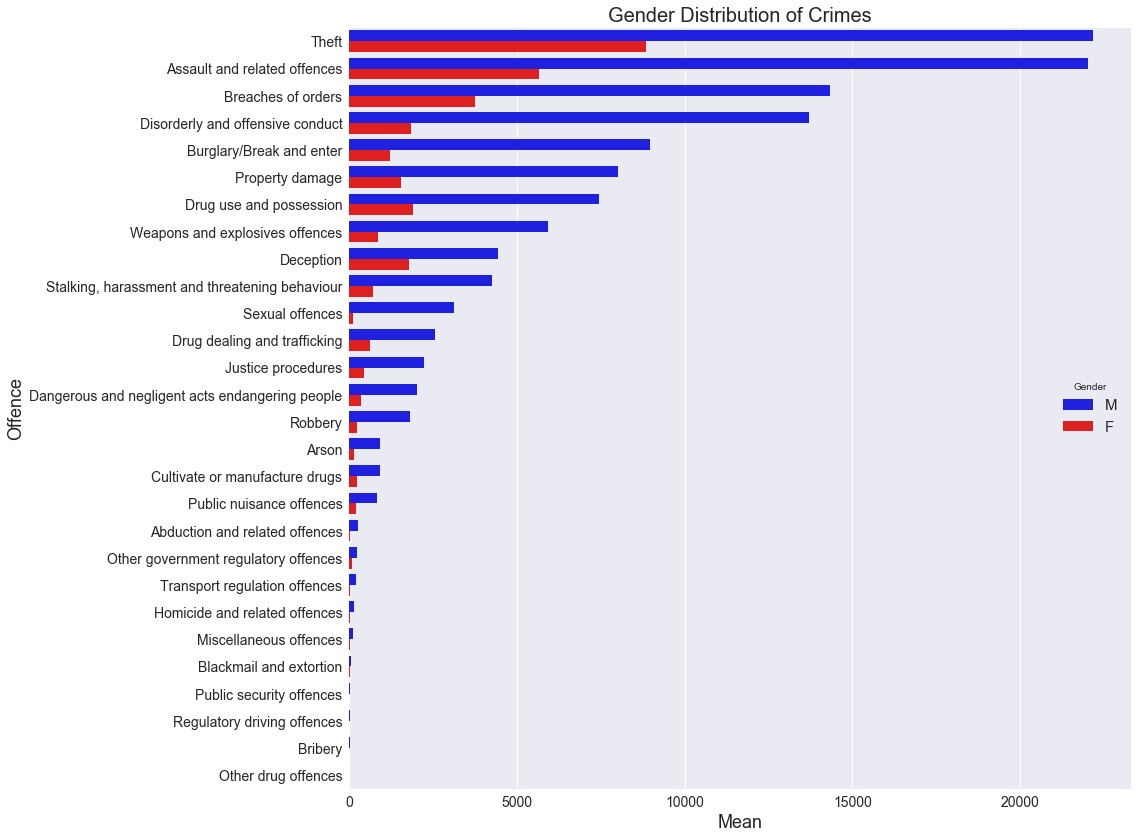

In [243]:
plt.clf()
plt.figure (figsize=(14,14))
sns.barplot(y='Offence', x='Mean', data=CatGenderDt.sort_values(by= 'Mean', ascending=False), hue='Gender', palette=('blue', 'red'))
plt.title('Gender Distribution of Crimes', fontsize=20)
plt.xlabel('Mean', fontsize=18)
plt.ylabel('Offence', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Gender', fontsize=15, loc='center right')
plt.show();

* Data missing for :Male Other drug offences, Female Bribery, Female Other drug offences, Female Public security offences, Female Regulatory driving offences 

### Crimes committed by males

In [244]:
#Mean sorted from high to low
malecrimes=CatGenderDt[CatGenderDt.Gender=='M'].sort_values(by= 'Mean', ascending=False)
malecrimes.index=malecrimes.Category
del malecrimes['Category']

In [245]:
malecrimes.head()

,Gender,2012,2013,2014,2015,2016,Mean,Offence
Category,,,,,,,,
B40,M,20499.0,21595,20086.0,21676.0,27069.0,22185.0,Theft
A20,M,19060.0,21646,21954.0,22469.0,25075.0,22040.8,Assault and related offences
E20,M,9037.0,11119,15836.0,16784.0,18891.0,14333.4,Breaches of orders
D20,M,16950.0,15726,13795.0,11631.0,10399.0,13700.2,Disorderly and offensive conduct
B30,M,8906.0,8429,8504.0,8516.0,10514.0,8973.8,Burglary/Break and enter


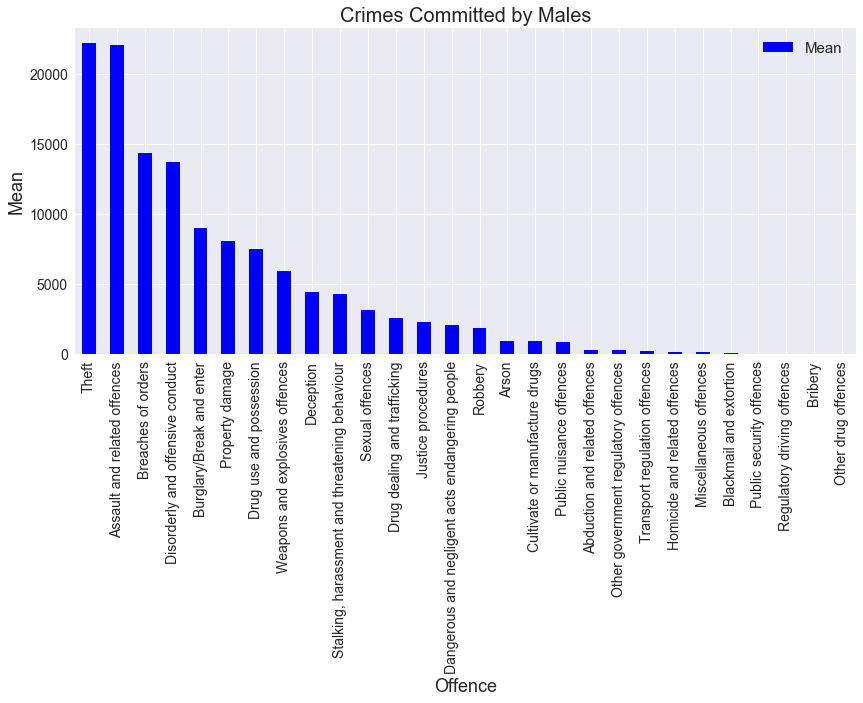

In [246]:
malecrimes.plot(x='Offence', y='Mean', kind='bar', figsize=(14,6), color='blue')
plt.title('Crimes Committed by Males', fontsize=20)
plt.ylabel('Mean', fontsize=18)
plt.xlabel('Offence', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)
plt.show();

### Crimes committed by females

In [247]:
#unsorted
femalecrimes=CatGenderDt[CatGenderDt.Gender=='F'].sort_values(by= 'Mean', ascending=False)
femalecrimes.index=femalecrimes.Category
del femalecrimes['Category']

In [248]:
femalecrimes.head()

,Gender,2012,2013,2014,2015,2016,Mean,Offence
Category,,,,,,,,
B40,F,8899.0,9528,7686.0,8392.0,9754.0,8851.8,Theft
A20,F,4885.0,5429,5650.0,5846.0,6467.0,5655.4,Assault and related offences
E20,F,2245.0,2791,4134.0,4428.0,5077.0,3735.0,Breaches of orders
C30,F,1370.0,1600,1871.0,2209.0,2380.0,1886.0,Drug use and possession
D20,F,2105.0,2085,1944.0,1657.0,1467.0,1851.6,Disorderly and offensive conduct


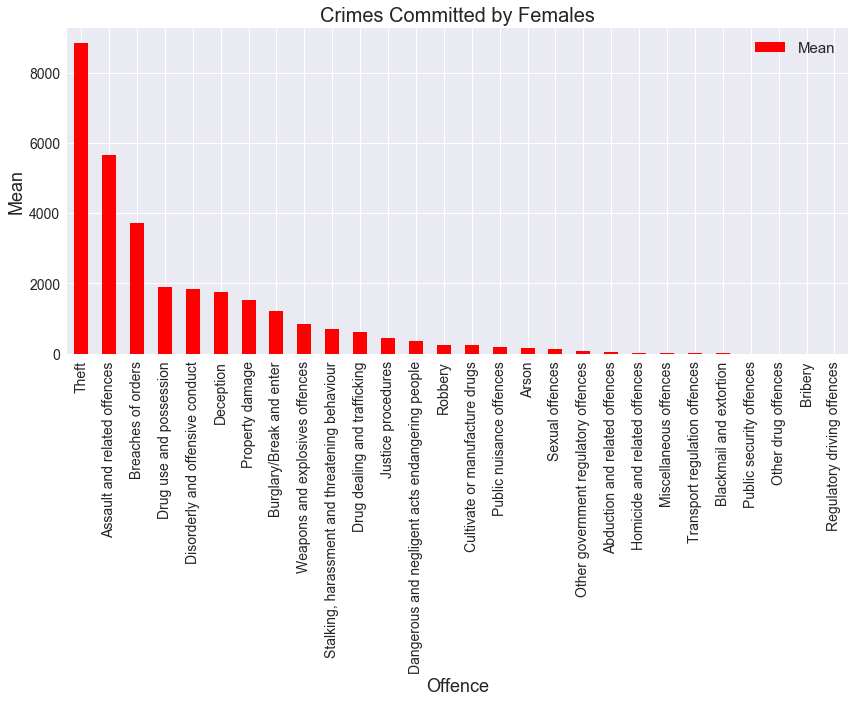

In [249]:
femalecrimes.plot(x='Offence', y='Mean', kind='bar', figsize=(14,6),color='red')
plt.title('Crimes Committed by Females', fontsize=20)
plt.ylabel('Mean', fontsize=18)
plt.xlabel('Offence', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)
plt.show();

### Gender x Year

To do?

In [287]:
(CatGenderDt.groupby(by='Gender').mean().T[:5])[['M', 'F']]

Gender,M,F
2012,4262.555556,1107.958333
2013,4381.928571,1057.142857
2014,4603.000000,1137.769231
2015,4750.222222,1215.846154
2016,5121.535714,1366.423077


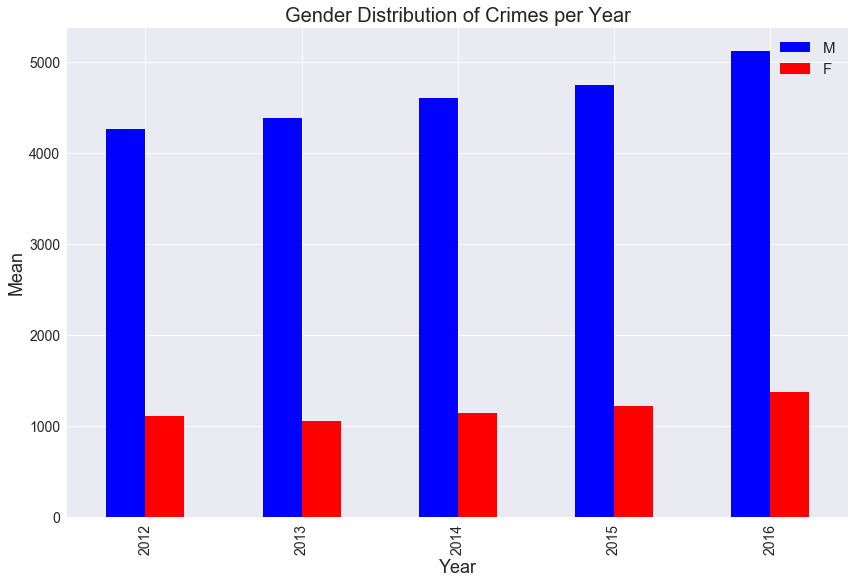

In [289]:
(CatGenderDt.groupby(by='Gender').mean().T[:5])[['M', 'F']].plot(kind='bar', figsize=(14,9), color=('blue', 'red'))


plt.title('Gender Distribution of Crimes per Year', fontsize=20)


plt.ylabel('Mean', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)
plt.show();

### Year x Crime

To do?

## <font color=red>__- Theft, Assault/related offences and Breaches of orders are the top three crimes for both males and females. Sexual offences are at 11th place for males but further down for females__ </font>

# Crime by age x gender

In [250]:
AgeGenderCrime=pd.read_csv('Crimebyagexgender.csv', encoding='cp1252')
CatGenderDt.shape

(56, 9)

In [251]:
AgeGenderCrime.head()

,gender,AgeGroups,y_2012,y_2013,y_2014,y_2015,y_2016
0,M,10–14,2595.638902,2376.912011,2267.883174,2358.101608,2323.021828
1,M,15–19,11836.970260,11526.769310,11041.647460,10785.747560,11158.809960
2,M,20–24,10720.401060,10762.610250,10478.154220,9828.549377,11091.156770
3,M,25–29,7808.940970,8370.995734,8508.822491,8673.426816,9611.166840
4,M,30–34,7040.423626,7631.598858,7692.202099,8036.067073,8802.186815


In [252]:
AgeGenderCrime['AgeGroups']=AgeGenderCrime['AgeGroups'].replace('65 years and over', '65+')
AgeGenderCrime.columns=['gender', 'AgeGroups', '2012', '2013', '2014', '2015', '2016']
# Mean of the 5 years per Agegroup
AgeGenderCrime['Mean']=[AgeGenderCrime[['2012', '2013', '2014', '2015', '2016']].iloc[i].mean() for i in range(AgeGenderCrime.shape[0])]

In [253]:
AgeGenderCrime.head()

,gender,AgeGroups,2012,2013,2014,2015,2016,Mean
0,M,10–14,2595.638902,2376.912011,2267.883174,2358.101608,2323.021828,2384.311505
1,M,15–19,11836.970260,11526.769310,11041.647460,10785.747560,11158.809960,11269.988910
2,M,20–24,10720.401060,10762.610250,10478.154220,9828.549377,11091.156770,10576.174335
3,M,25–29,7808.940970,8370.995734,8508.822491,8673.426816,9611.166840,8594.670570
4,M,30–34,7040.423626,7631.598858,7692.202099,8036.067073,8802.186815,7840.495694


In [254]:
AgeGenderCrime[AgeGenderCrime.isnull().any(axis=1)]

,gender,AgeGroups,2012,2013,2014,2015,2016,Mean


### Gender x Age

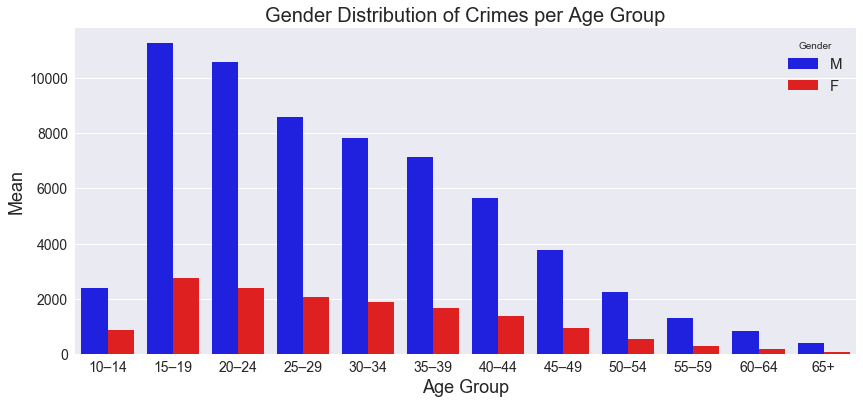

In [255]:
plt.figure (figsize=(14,6))
sns.barplot(x='AgeGroups', y='Mean', data=AgeGenderCrime, hue='gender', palette=('blue', 'red'))
plt.title('Gender Distribution of Crimes per Age Group', fontsize=20)
plt.ylabel('Mean', fontsize=18)
plt.xlabel('Age Group', fontsize=18)
plt.legend(title='Gender', loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

### Age x Yearly Crimes

In [256]:
AgeGenderCrime[['AgeGroups','2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroups').sum()

,2012,2013,2014,2015,2016
AgeGroups,,,,,
10–14,3545.850543,3176.011409,3051.392345,3218.115489,3262.679995
15–19,14770.098854,14412.451244,13734.935188,13268.263054,13934.429748
20–24,12795.223253,13130.348890,12822.562155,12268.796583,13849.804522
25–29,9496.048997,10192.732281,10423.533247,10983.243866,12091.970655
30–34,8645.836920,9509.142940,9519.070487,10007.109832,10955.189218
35–39,7540.030924,8407.145472,8617.606497,9196.320681,10255.060696
40–44,5890.507399,6695.598670,6723.459477,7329.495557,8413.922751
45–49,3748.193181,4455.993797,4805.312496,4808.190353,5686.978635
50–54,2275.825287,2609.729538,2723.237774,2939.016042,3376.967075


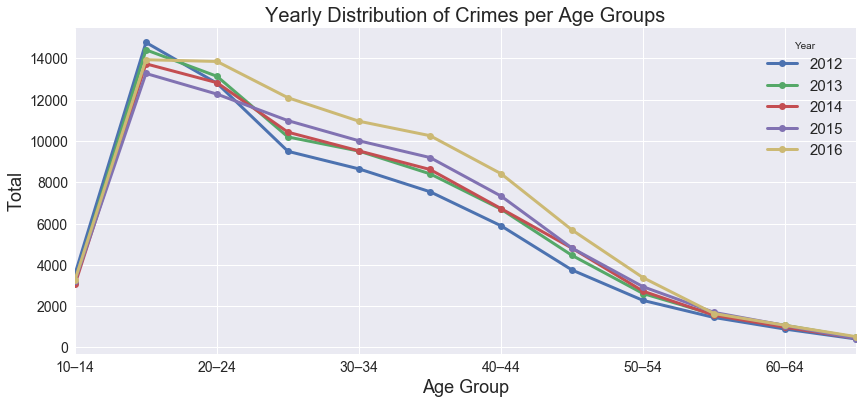

In [257]:
#combined female and male crime per agegroup
(AgeGenderCrime[['AgeGroups','2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroups').sum()).plot(kind='line', figsize=(14,6), linewidth=3, marker='o')
plt.title('Yearly Distribution of Crimes per Age Groups', fontsize=20)
plt.ylabel('Total', fontsize=18)
plt.xlabel('Age Group', fontsize=18)
plt.legend(title='Year', loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

### Gender x Yearly Crimes

In [258]:
(AgeGenderCrime.groupby(by='gender').mean().T[:5])[['M', 'F']]

gender,M,F
2012,4822.900856,1131.654839
2013,5077.268400,1233.907807
2014,5068.593802,1214.560935
2015,5160.631231,1273.138784
2016,5676.691656,1411.617880


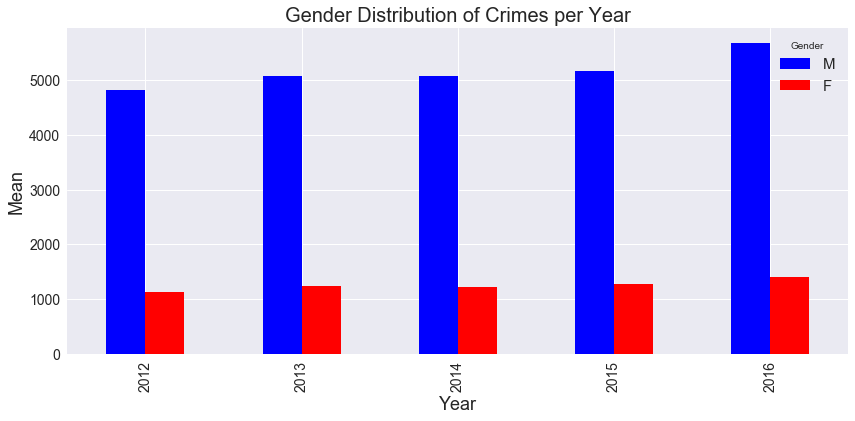

In [259]:
(AgeGenderCrime.groupby(by='gender').mean().T[:5])[['M', 'F']].plot(kind='bar', figsize=(14,6), color=('blue', 'red'))
plt.title('Gender Distribution of Crimes per Year', fontsize=20)
plt.ylabel('Mean', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend(title='Gender', loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

## <font color=red> - __15-19 year old males and females are more likely to commit a crime. - 2016 saw an increase in crimes by both males and females in most age groups__ </font>

# Sex Offenders

In [260]:
SexOffendrs=pd.read_csv('sexoffenders.csv')
SexOffendrs.shape

(24, 7)

In [261]:
SexOffendrs.head()

,gender,AgeGroup,y_2012,y_2013,y_2014,y_2015,y_2016
0,M,Oct-14,120.0,125.0,133.0,117.0,149.0
1,M,15-19,346.0,367.0,423.0,349.0,447.0
2,M,20-24,303.0,308.0,362.0,367.0,426.0
3,M,25-29,271.0,304.0,302.0,324.0,351.0
4,M,30-34,248.0,251.0,276.0,320.0,365.0


In [262]:
SexOffendrs['AgeGroup']=SexOffendrs.AgeGroup.replace('Oct-14', '10-14')
SexOffendrs['AgeGroup']=SexOffendrs.AgeGroup.replace('65 years and over', '65+')
SexOffendrs.columns = ['gender', 'AgeGroup', '2012', '2013', '2014', '2015', '2016']
# mean offender for 5 year in each row
SexOffendrs['Mean']=[(SexOffendrs[['2012', '2013', '2014', '2015', '2016']].iloc[i].mean()) for i in range(SexOffendrs.shape[0])]

In [263]:
SexOffendrs.head()

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean
0,M,10-14,120.0,125.0,133.0,117.0,149.0,128.8
1,M,15-19,346.0,367.0,423.0,349.0,447.0,386.4
2,M,20-24,303.0,308.0,362.0,367.0,426.0,353.2
3,M,25-29,271.0,304.0,302.0,324.0,351.0,310.4
4,M,30-34,248.0,251.0,276.0,320.0,365.0,292.0


In [264]:
SexOffendrs[SexOffendrs.isnull().any(axis=1)]

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean
20,F,50-54,NaN,6.0,11.0,6.0,9.0,8.000000
22,F,60-64,NaN,NaN,NaN,NaN,NaN,NaN
23,F,65+,NaN,7.0,NaN,5.0,5.0,5.666667


### Age Group x Gender

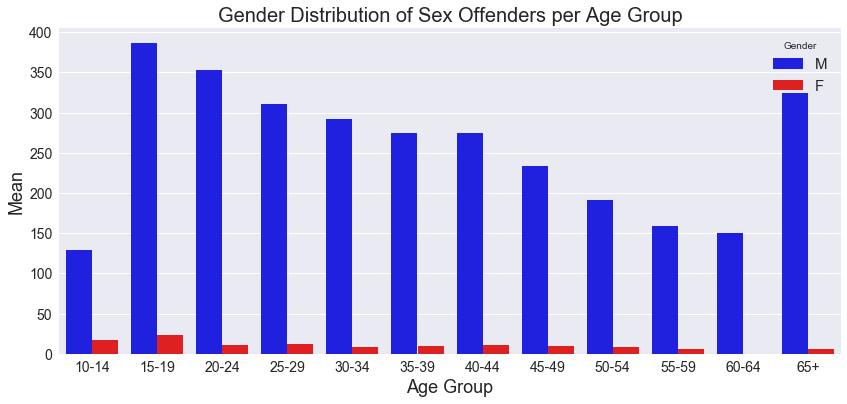

In [265]:
#Mean Sex Offenders per Age Group for F and M
plt.figure(figsize=(14,6))
sns.barplot(x = 'AgeGroup', y = "Mean", data = SexOffendrs, hue='gender', palette=('blue', 'red'))
plt.title('Gender Distribution of Sex Offenders per Age Group', fontsize=20)
plt.ylabel('Mean', fontsize=18)
plt.xlabel('Age Group', fontsize=18)
plt.legend(title='Gender', loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

*Data not complete for 50-54 and 60+ Females

### Year x Gender

In [266]:
#Mean Sex Offenders per Year for F and M
(SexOffendrs.groupby(by=['gender']).mean().T[:5])[['M','F']]

gender,M,F
2012,224.250000,10.333333
2013,239.416667,10.727273
2014,257.000000,10.600000
2015,259.583333,10.000000
2016,302.666667,14.454545


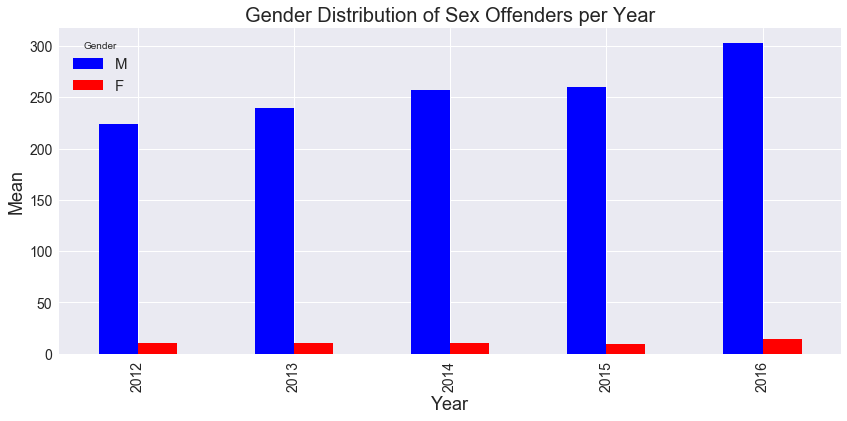

In [267]:
(SexOffendrs.groupby(by=['gender']).mean().T[:5])[['M','F']].plot(kind='bar', figsize=(14,6), color=('blue', 'red'))
plt.title('Gender Distribution of Sex Offenders per Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Mean', fontsize=18)
plt.legend(title='Gender', loc='upper left', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

### Age Group x Year

In [268]:
#Total Sex Offenders per Age Group
AgeYear =SexOffendrs[['AgeGroup', '2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroup').sum()
AgeYear

,2012,2013,2014,2015,2016
AgeGroup,,,,,
10-14,130.0,147.0,144.0,132.0,174.0
15-19,370.0,387.0,440.0,376.0,476.0
20-24,308.0,324.0,377.0,372.0,437.0
25-29,279.0,314.0,313.0,337.0,368.0
30-34,253.0,262.0,281.0,330.0,377.0
35-39,261.0,254.0,301.0,270.0,339.0
40-44,271.0,286.0,272.0,284.0,317.0
45-49,216.0,238.0,245.0,223.0,294.0
50-54,194.0,187.0,192.0,190.0,227.0


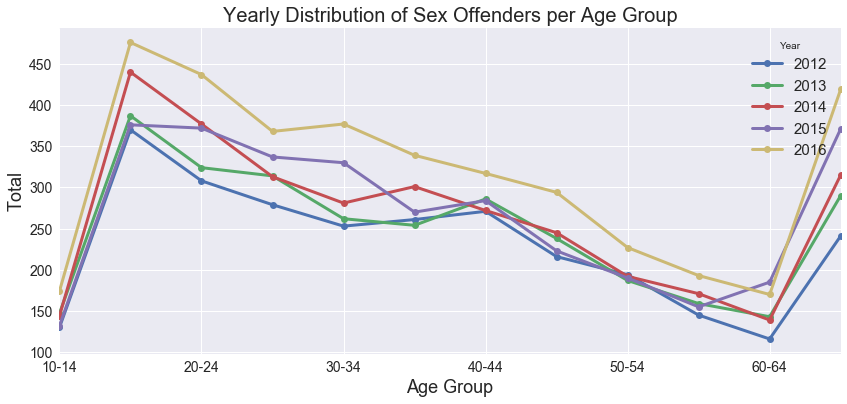

In [269]:
plt.figure('By age group')
AgeYear.plot(y=['2012', '2013', '2014', '2015', '2016'] , kind='line', figsize=(14,6), linewidth=3, marker='o')
plt.title('Yearly Distribution of Sex Offenders per Age Group', fontsize=20)
plt.legend(title='Year', loc='best', fontsize=15)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

*Data not complete for 50-54 and 60+ Females

## <font color=red> - __15-19 year old males and females are more likely to be a sex offender (similar to crimes in general). But male are more likely to be sex offenders than female. 65+ males are more likely to be sex offenders than general criminals - 2016 saw an increase in sex crimes by both males and females for all age groups contributing to the increase in total crimes in 2016__ </font>

# Victims of sexual offence

In [270]:
dt=pd.read_excel('victimsofsexualoffence.xlsx')
dt.shape

(28, 7)

In [271]:
(dt['AgeGroup']).iloc[2]='10-14'
(dt['AgeGroup']).iloc[16]='10-14'
dt['AgeGroup']=dt.AgeGroup.replace('65 years and over', '65+')
dt['AgeGroup']=dt.AgeGroup.replace('0–4','00-04')
dt['AgeGroup']=dt.AgeGroup.replace('5–9','05-09')
dt.columns = ['gender', 'AgeGroup', '2012', '2013', '2014', '2015', '2016']
dt['Mean']=[dt[['2012', '2013', '2014', '2015', '2016']].iloc[i].mean() for i in range(dt.shape[0])]

C:\Users\VinTab\Desktop\programming\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [272]:
dt.head()

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean
0,M,00-04,61,50,48,67,74,60.0
1,M,05-09,157,157,176,189,228,181.4
2,M,10-14,186,166,177,205,284,203.6
3,M,15-19,137,118,154,161,186,151.2
4,M,20-24,62,70,69,72,92,73.0


In [273]:
dt[dt.isnull().any(axis=1)]

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean


### Age Group x Gender

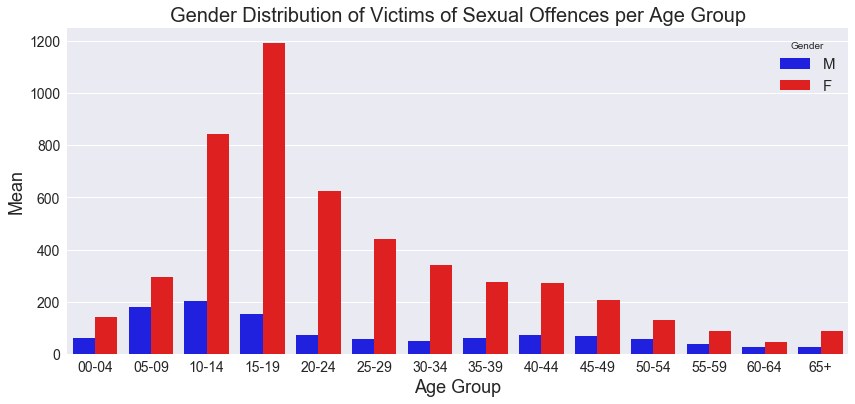

In [274]:
#Mean Victims of Sexual Offences per Age Group for F and M
plt.figure(figsize=(14,6))
sns.barplot(x = 'AgeGroup', y = "Mean", data = dt, hue='gender', palette=('blue', 'red'))
plt.title('Gender Distribution of Victims of Sexual Offences per Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Mean', fontsize=18)
plt.legend(title='Gender', loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

### Year x Gender

In [275]:
#Mean Victims of Sexual Offences per Year for F and M
(dt.groupby(by=['gender']).mean().T[:5])[['M', 'F']]

gender,M,F
2012,64.000000,308.000000
2013,67.428571,330.357143
2014,78.142857,339.214286
2015,87.571429,364.857143
2016,103.214286,437.500000


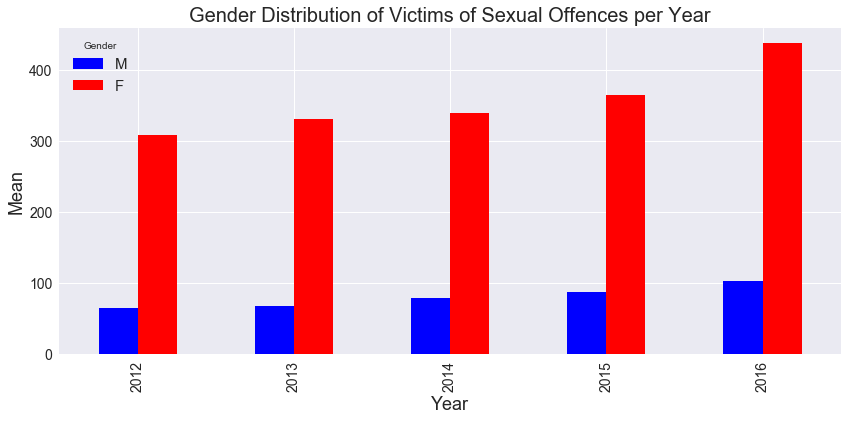

In [276]:
(dt.groupby(by=['gender']).mean().T[:5])[['M', 'F']].plot(kind='bar', figsize=(14,6), color=('blue', 'red'))
plt.title('Gender Distribution of Victims of Sexual Offences per Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Mean', fontsize=18)
plt.legend(title='Gender', loc='upper left', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

### Age Group x Year

In [277]:
#Total Victims of Sexual Offences per Age Group
AgeYearVic = dt[['AgeGroup', '2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroup').sum()
AgeYearVic

,2012,2013,2014,2015,2016
AgeGroup,,,,,
00-04,196,204,177,198,233
05-09,412,450,465,505,555
10-14,947,936,947,1092,1310
15-19,1220,1217,1253,1345,1682
20-24,649,694,651,667,836
25-29,400,441,463,535,647
30-34,331,367,380,406,461
35-39,284,298,312,362,426
40-44,281,318,353,381,388


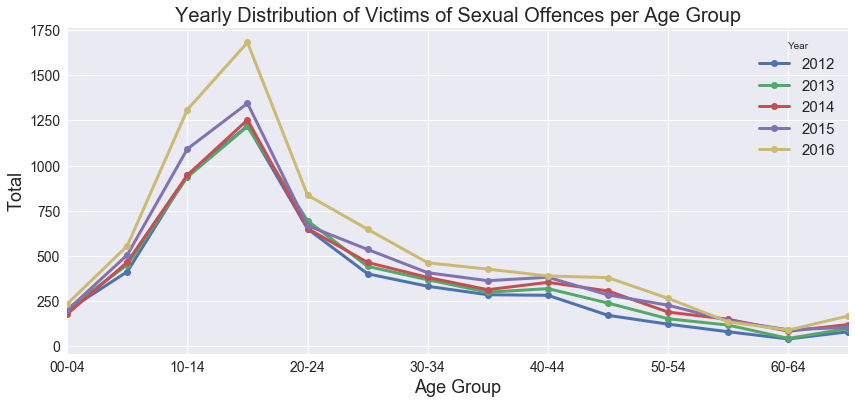

In [278]:
#Victims of Sexual Offences per Age Group
AgeYearVic.plot(y=['2012', '2013', '2014', '2015', '2016'], kind='line', figsize=(14,6) , linewidth=3, marker='o')
plt.title('Yearly Distribution of Victims of Sexual Offences per Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.legend(title='Year', loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

## <font color=red> - __15-19 year old females and 10-14 old males are more likely to be victims of sex crimes.  - 2016 saw an increase in both males and females victims of sex crimes for all age groups. This is consistent with the increase in offenders. __ </font>